In [17]:
#import librarys

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data

df=pd.read_csv('Sales_with_NaNs_v1.3.csv')
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [6]:
#check null cells

df.isnull().sum()

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64

In [8]:
#we will delete all the null cells because we have big data 

df = df.dropna()

In [10]:
#check the means to see if there is change 

# there is a change show in mean but is this a real change or it is Coincidentally ?
print(np.mean(df['Sales_Before']))
print(np.mean(df['Sales_After']))

203.88245974875218
280.6282249662591


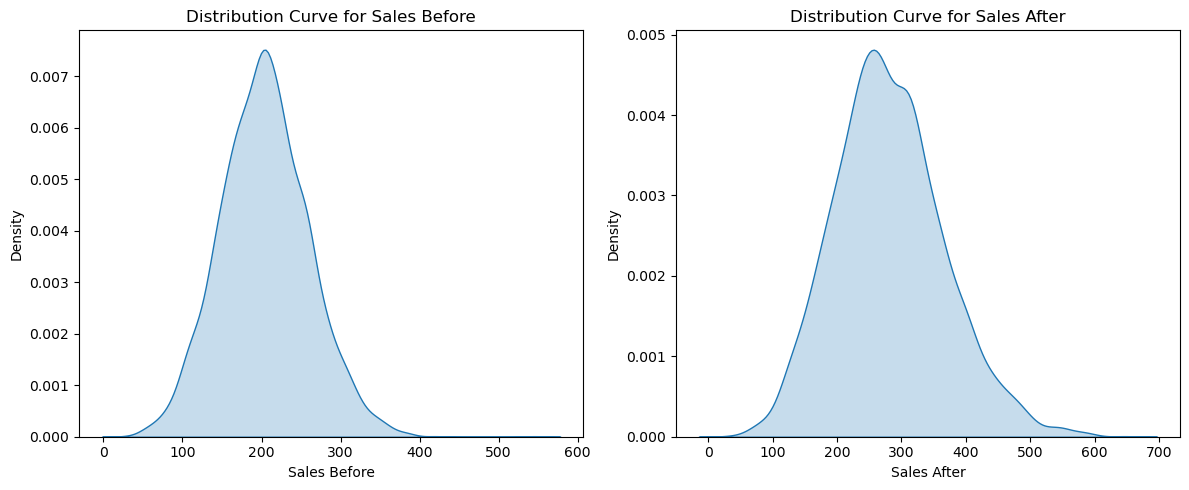

In [19]:
#lets see the distribution curve for the sales 
#the curve also shows a big step forward in the sales after the curve get bigger to include also  600 & 700
#we also conclude that sales before is more homogeneous than sales after its mean that the company interfere doesnot affect all the customers

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot for 'Sales Before'
sns.kdeplot(df['Sales_Before'], fill=True, ax=axes[0])
axes[0].set_title('Distribution Curve for Sales Before')
axes[0].set_xlabel('Sales Before')
axes[0].set_ylabel('Density')

# Second plot for 'Sales After'
sns.kdeplot(df['Sales_After'].dropna(), fill=True, ax=axes[1])
axes[1].set_title('Distribution Curve for Sales After')
axes[1].set_xlabel('Sales After')
axes[1].set_ylabel('Density')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [21]:
#we will make p-value test to make sure that the change in sales is not from Coincidentally 
# the null hypothesis rejected it is mean there is a real change in the sales

from scipy import stats
_,p_value=stats.ttest_ind(a=df['Sales_Before'],b=df['Sales_After'],equal_var=False)
print(p_value)
if p_value < 0.05:
    print('we reject null hypothesis')
else:
    print('we reject alternitive hypothesis')

0.0
we reject null hypothesis


In [23]:
#now lets see the customer satisfaction 
#lets see the mean first 
# there is a slide change in mean
print(np.mean(df['Customer_Satisfaction_Before']))
print(np.mean(df['Customer_Satisfaction_After']))

70.25818002129333
73.95741573038259


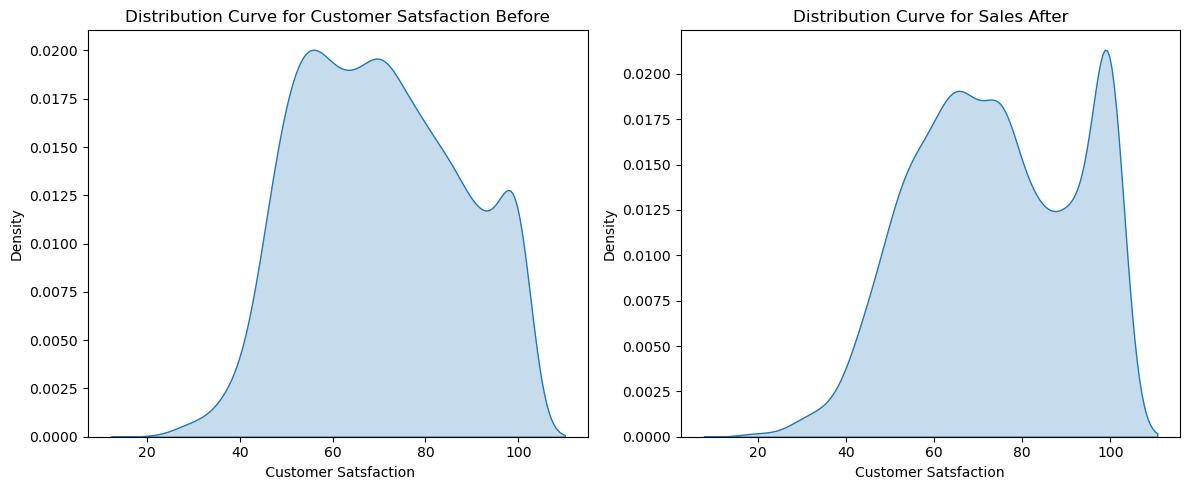

In [31]:
#customer satisfaction distribution curve shows slide increase in high rating and slide decreasing in low rating   

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df['Customer_Satisfaction_Before'], fill=True, ax=axes[0])
axes[0].set_title('Distribution Curve for Customer Satsfaction Before')
axes[0].set_xlabel(' Customer Satsfaction')
axes[0].set_ylabel('Density')

sns.kdeplot(df['Customer_Satisfaction_After'], fill=True, ax=axes[1])
axes[1].set_title('Distribution Curve for Sales After')
axes[1].set_xlabel('Customer Satsfaction')
axes[1].set_ylabel('Density')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [35]:
#check p-value to 
#p-values shows a real change in customer satisfaction 

from scipy import stats
_,p_value=stats.ttest_ind(a=df['Customer_Satisfaction_Before'],b=df['Customer_Satisfaction_After'],equal_var=False)
print(p_value)
if p_value < 0.05:
    print('we reject null hypothesis')
else:
    print('we reject alternitive hypothesis')

4.098780466561747e-18
we reject null hypothesis


In [25]:
#make new colums that had the change vlaue 

#to see if there is a relation ship between sales an customer satsifaction 
df['sales_change']=df['Sales_After'] - df['Sales_Before']
df['satsfaction_change']= df['Customer_Satisfaction_After'] - df['Customer_Satisfaction_Before']

In [29]:
#check the table 
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made,sales_change,satsfaction_change
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes,134.475440,0.000000
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No,22.352379,1.219265
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes,37.151323,-9.521925
6,Control,High Value,191.713918,222.409356,89.967827,85.120975,Yes,30.695439,-4.846852
9,Treatment,High Value,235.071493,352.756872,72.919851,70.753225,No,117.685379,-2.166626
...,...,...,...,...,...,...,...,...,...
9984,Treatment,High Value,234.970184,360.308311,100.000000,89.778035,Yes,125.338126,-10.221965
9985,Treatment,Low Value,190.882210,300.525743,51.074736,56.101875,Yes,109.643533,5.027140
9987,Treatment,Medium Value,164.011355,247.268535,64.118872,75.671792,Yes,83.257180,11.552920
9989,Control,Medium Value,109.386552,145.054224,70.249026,76.630699,No,35.667672,6.381673


<Axes: xlabel='sales_change', ylabel='satsfaction_change'>

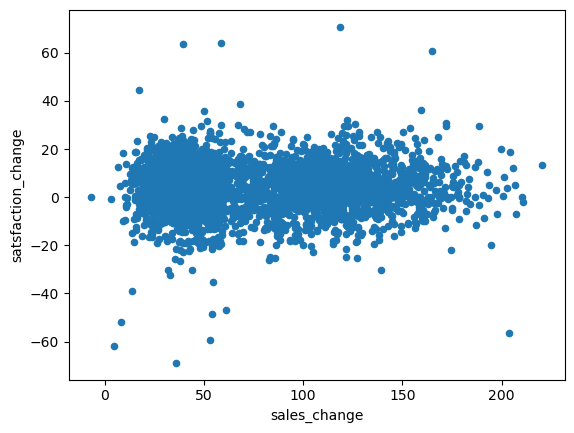

In [27]:
#scaterr plot shows no relationship betwen customer satsifaction and sales 

df.plot(x='sales_change',y='satsfaction_change',kind='scatter')

Text(0.5, 1.0, 'Dealers Sales')

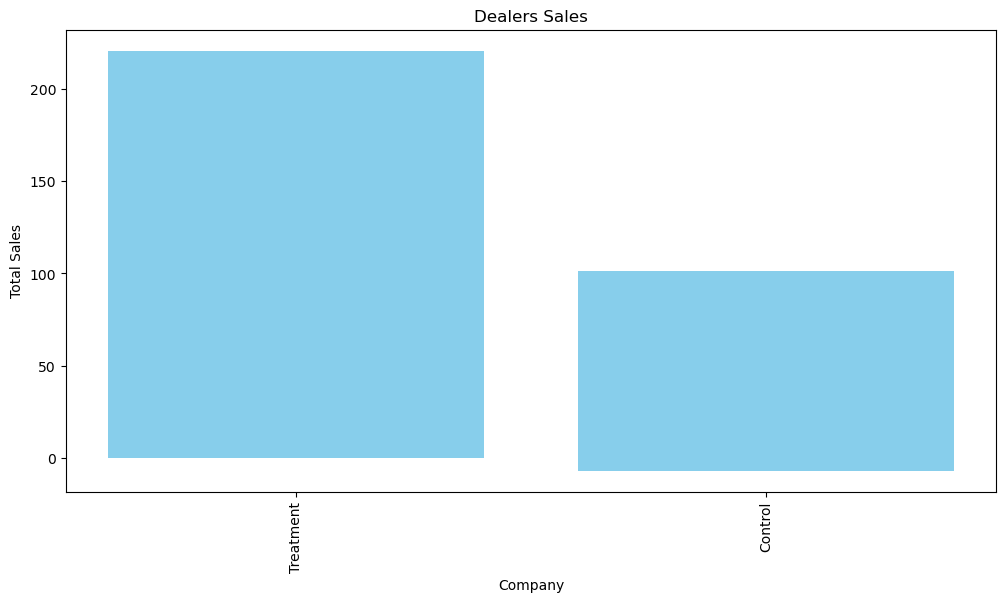

In [63]:
#which dealer made the highst change in sales ?

sorted_data = df.sort_values('sales_change', ascending=False)
plt.figure(figsize=(12, 6))  # Adjust width and height
plt.bar(sorted_data['Group'], sorted_data['sales_change'], color='skyblue')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Total Sales')
plt.title('Dealers Sales')

Text(0.5, 1.0, 'Dealers Sales')

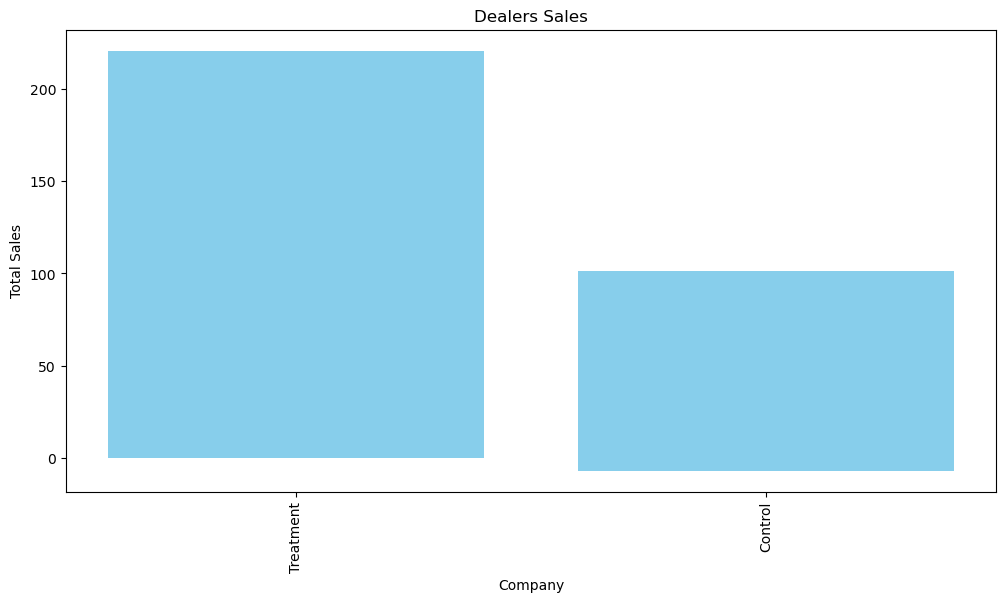

In [65]:
#which dealer made the highst change in customer satsifaction  ?

sorted_data = df.sort_values('satsfaction_change', ascending=False)
plt.figure(figsize=(12, 6))  # Adjust width and height
plt.bar(sorted_data['Group'], sorted_data['sales_change'], color='skyblue')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Total Sales')
plt.title('Dealers Sales')

Text(0.5, 0, 'Number of Customers')

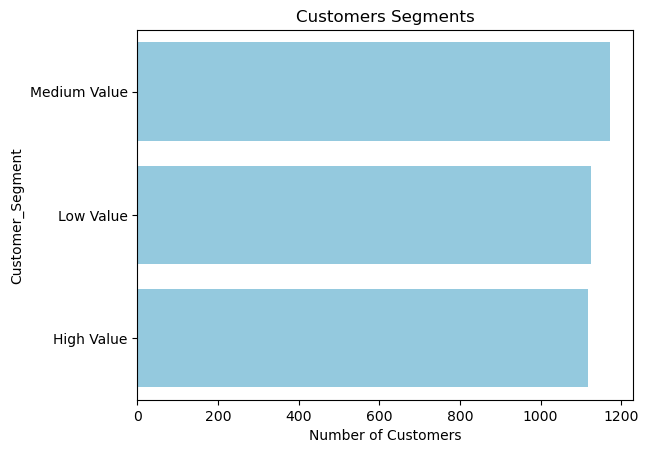

In [31]:
# number of customers on customers segments

order = df['Customer_Segment'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df ,y='Customer_Segment',order=order,color='skyblue')
plt.title("Customers Segments")
plt.xlabel('Number of Customers')